## Pandas

### Источники данных
**pandas_datareader** - https://pandas-datareader.readthedocs.io/en/latest/remote_data.html

In [2]:
# Import all libraries needed for the tutorial

# General syntax to import specific functions in a library: 
##from (library) import (specific library function)
from pandas import DataFrame, read_csv

# General syntax to import a library but no functions: 
##import (library) as (give the library a nickname/alias)
import matplotlib.pyplot as plt
import pandas as pd #this is how I usually import pandas
import sys #only needed to determine Python version number
import matplotlib #only needed to determine Matplotlib version number

# Enable inline plotting
%matplotlib inline

In [26]:
names = ['Bob','Jessica','Mary','John','Mel']
births = [968, 155, 77, 578, 973]

In [27]:
zip?

Init signature: zip(self, /, *args, **kwargs)
Docstring:     
zip(*iterables, strict=False) --> Yield tuples until an input is exhausted.

   >>> list(zip('abcdefg', range(3), range(4)))
   [('a', 0, 0), ('b', 1, 1), ('c', 2, 2)]

The zip object yields n-length tuples, where n is the number of iterables
passed as positional arguments to zip().  The i-th element in every tuple
comes from the i-th iterable argument to zip().  This continues until the
shortest argument is exhausted.

If strict is true and one of the arguments is exhausted before the others,
raise a ValueError.
Type:           type
Subclasses:     

In [29]:
baby_dataset = list(zip(names, births))
baby_dataset

[('Bob', 968), ('Jessica', 155), ('Mary', 77), ('John', 578), ('Mel', 973)]

In [30]:
df = pd.DataFrame(data=baby_dataset, columns=['Names', 'Births'])
df

,Names,Births
0,Bob,968
1,Jessica,155
2,Mary,77
3,John,578
4,Mel,973


In [31]:
df.to_csv?

Signature:
df.to_csv(
    path_or_buf: 'FilePath | WriteBuffer[bytes] | WriteBuffer[str] | None' = None,
    sep: 'str' = ',',
    na_rep: 'str' = '',
    float_format: 'str | Callable | None' = None,
    columns: 'Sequence[Hashable] | None' = None,
    header: 'bool_t | list[str]' = True,
    index: 'bool_t' = True,
    index_label: 'IndexLabel | None' = None,
    mode: 'str' = 'w',
    encoding: 'str | None' = None,
    compression: 'CompressionOptions' = 'infer',
    quoting: 'int | None' = None,
    quotechar: 'str' = '"',
    lineterminator: 'str | None' = None,
    chunksize: 'int | None' = None,
    date_format: 'str | None' = None,
    doublequote: 'bool_t' = True,
    escapechar: 'str | None' = None,
    decimal: 'str' = '.',
    errors: 'str' = 'strict',
    storage_options: 'StorageOptions' = None,
) -> 'str | None'
Docstring:
Write object to a comma-separated values (csv) file.

Parameters
----------
path_or_buf : str, path object, file-like object, or None, default None
  

In [32]:
df.to_csv('births1.csv', index=False, header=False)

In [33]:
pd.read_csv?

Signature:
pd.read_csv(
    filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]',
    *,
    sep: 'str | None | lib.NoDefault' = <no_default>,
    delimiter: 'str | None | lib.NoDefault' = None,
    header: "int | Sequence[int] | None | Literal['infer']" = 'infer',
    names: 'Sequence[Hashable] | None | lib.NoDefault' = <no_default>,
    index_col: 'IndexLabel | Literal[False] | None' = None,
    usecols=None,
    dtype: 'DtypeArg | None' = None,
    engine: 'CSVEngine | None' = None,
    converters=None,
    true_values=None,
    false_values=None,
    skipinitialspace: 'bool' = False,
    skiprows=None,
    skipfooter: 'int' = 0,
    nrows: 'int | None' = None,
    na_values=None,
    keep_default_na: 'bool' = True,
    na_filter: 'bool' = True,
    verbose: 'bool' = False,
    skip_blank_lines: 'bool' = True,
    parse_dates: 'bool | Sequence[Hashable] | None' = None,
    infer_datetime_format: 'bool | lib.NoDefault' = <no_default>,
    keep_date_col: 'bool' =

In [3]:
df = pd.read_csv('births1.csv', names=['Names', 'Births'])
df

,Names,Births
0,Bob,968
1,Jessica,155
2,Mary,77
3,John,578
4,Mel,973


In [38]:
df.dtypes

Names     object
Births     int64
dtype: object

In [39]:
df.shape

(5, 2)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Names   5 non-null      object
 1   Births  5 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 208.0+ bytes


In [41]:
df.describe()

,Births
count,5.000000
mean,550.200000
std,428.424672
min,77.000000
25%,155.000000
50%,578.000000
75%,968.000000
max,973.000000


In [42]:
df['Births'].max()

973

In [43]:
sorted = df.sort_values(['Births'], ascending=False)
sorted.head(1)

,Names,Births
4,Mel,973


Text(25, 0, "['973-Mel']")

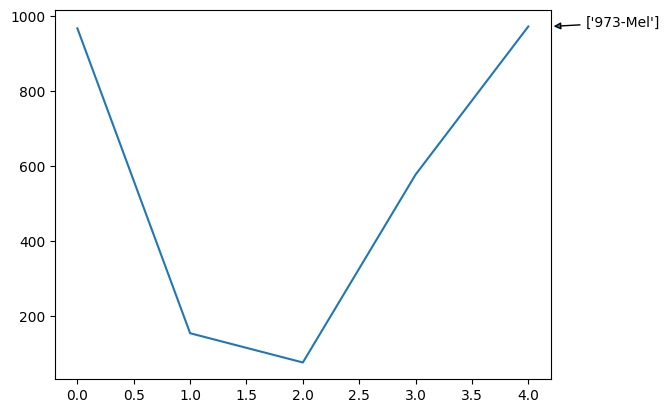

In [9]:
df['Births'].plot()

max_value = df['Births'].max()
filter = df['Births'] == df['Births'].max()
max_name = df['Names'][filter].values

text = str(max_value) + '-' + max_name
plt.annotate(text, xy=(1, max_value), xytext=(25,0), textcoords='offset points', xycoords=('axes fraction', 'data'), arrowprops={'arrowstyle': '-|>'})
# <---[973, Mel] - show on plot

In [4]:
plt.annotate?

Signature:
plt.annotate(
    text: 'str',
    xy: 'tuple[float, float]',
    xytext: 'tuple[float, float] | None' = None,
    xycoords: 'str | Artist | Transform | Callable[[RendererBase], Bbox | Transform] | tuple[float, float]' = 'data',
    textcoords: 'str | Artist | Transform | Callable[[RendererBase], Bbox | Transform] | tuple[float, float] | None' = None,
    arrowprops: 'dict[str, Any] | None' = None,
    annotation_clip: 'bool | None' = None,
    **kwargs,
) -> 'Annotation'
Docstring:
Annotate the point *xy* with text *text*.

In the simplest form, the text is placed at *xy*.

Optionally, the text can be displayed in another position *xytext*.
An arrow pointing from the text to the annotated point *xy* can then
be added by defining *arrowprops*.

Parameters
----------
text : str
    The text of the annotation.

xy : (float, float)
    The point *(x, y)* to annotate. The coordinate system is determined
    by *xycoords*.

xytext : (float, float), default: *xy*
    The position 

In [18]:
from numpy import random

#random.randint?
#len?
#zip?
#range?
random.seed?

Docstring:
seed(seed=None)

Reseed the singleton RandomState instance.

Notes
-----
This is a convenience, legacy function that exists to support
older code that uses the singleton RandomState. Best practice
is to use a dedicated ``Generator`` instance rather than
the random variate generation methods exposed directly in
the random module.

See Also
--------
numpy.random.Generator
Type:      builtin_function_or_method

In [19]:
names = ['Bob','Jessica','Mary','John','Mel']

random.seed(341)
random_names = [names[random.randint(low=0, high=len(names))] for i in range(1000)]

random_names[:10]

['John', 'John', 'Mary', 'Mary', 'Mel', 'Mel', 'Bob', 'Mel', 'John', 'Bob']

In [20]:
births = [random.randint(low=0, high=1000) for i in range(1000)]
births[:10]

[470, 175, 153, 980, 20, 411, 335, 673, 915, 257]

In [21]:
baby_dataset = list(zip(random_names, births))
baby_dataset[:10]

[('John', 470),
 ('John', 175),
 ('Mary', 153),
 ('Mary', 980),
 ('Mel', 20),
 ('Mel', 411),
 ('Bob', 335),
 ('Mel', 673),
 ('John', 915),
 ('Bob', 257)]

In [22]:
df = pd.DataFrame(data = baby_dataset, columns=['Names', 'Births'])
df[:10]

,Names,Births
0,John,470
1,John,175
2,Mary,153
3,Mary,980
4,Mel,20
5,Mel,411
6,Bob,335
7,Mel,673
8,John,915
9,Bob,257


In [23]:
df.to_csv('births1000.csv', index=False, header=False)

In [26]:
df = pd.read_csv('births1000.csv', names=['Names', 'Births'])
df.head()

,Names,Births
0,John,470
1,John,175
2,Mary,153
3,Mary,980
4,Mel,20


In [27]:
df.tail(10)

,Names,Births
990,Mary,873
991,Mary,508
992,Bob,0
993,Bob,844
994,Mel,139
995,Bob,861
996,Mel,359
997,Mary,105
998,Bob,256
999,Jessica,228


## Какие уникальные имена присутствуют в DataFrame?

In [28]:
df['Names'].unique()

array(['John', 'Mary', 'Mel', 'Bob', 'Jessica'], dtype=object)

In [31]:
df['Names'].describe()

count     1000
unique       5
top        Bob
freq       218
Name: Names, dtype: object

## Посчитать суммарное количество рождений для каждого имени

name | count births
------------------- 
Bob  | 12345


In [36]:
name = df.groupby('Names')
df = name.sum()
df.head(10)

,Births
Names,
Bob,106217
Jessica,90380
John,96573
Mary,102325
Mel,106163


In [37]:
sorted = df.sort_values(['Births'], ascending=False)
sorted.head(1)

,Births
Names,
Bob,106217


<Axes: xlabel='Names'>

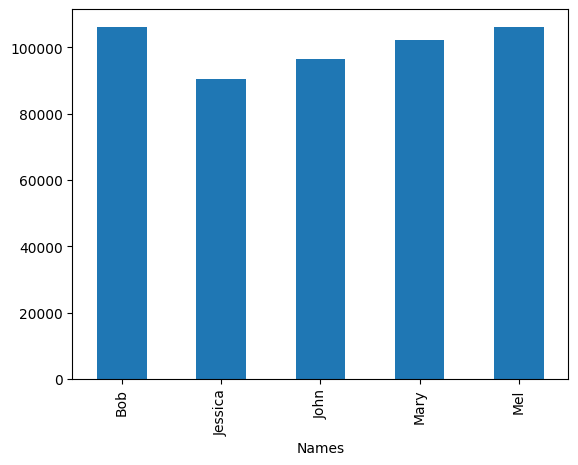

In [38]:
df['Births'].plot.bar()

In [14]:
import pandas as pd
from pandas_datareader import data
import datetime as dt
%matplotlib inline

data?

Type:        module
String form: <module 'pandas_datareader.data' from 'c:\\Python310\\lib\\site-packages\\pandas_datareader\\data.py'>
File:        c:\python310\lib\site-packages\pandas_datareader\data.py
Docstring:   Module contains tools for collecting data from various remote sources

In [22]:
# Select some dates to play with
start = pd.to_datetime('2017-01-01')
end = pd.to_datetime('2017-08-02')

#df = data.get_data_moex(['USD000UTSTOM', 'MAGN'], '2020-07-02', '2020-07-07')
df = data.MoexReader('SBER', '2020-07-02', '2020-07-03').read_all_boards()
df

,ACCINT,ADMITTEDQUOTE,ADMITTEDVALUE,BEICLOSE,BID,BOARDID,BOARDNAME,BUYBACKDATE,CBRCLOSE,CLOSE,...,TRENDWAPPR,TYPE,VALUE,VOLUME,WAPRICE,WAVAL,YIELDATWAP,YIELDCLOSE,YIELDLASTCOUPON,YIELDTOOFFER
TRADEDATE,,,,,,,,,,,,,,,,,,,,,
2020-07-02,NaN,NaN,NaN,NaN,0.0,MXBD,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-07-03,NaN,NaN,NaN,NaN,0.0,MXBD,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-07-02,NaN,NaN,0.000000e+00,NaN,NaN,SMAL,NaN,NaN,NaN,209.90,...,NaN,NaN,1.014523e+04,49.0,208.11000,0.0,NaN,NaN,NaN,NaN
2020-07-02,NaN,210.00,1.514438e+10,NaN,NaN,TQBR,NaN,NaN,NaN,209.60,...,NaN,NaN,1.589563e+10,76382050.0,208.11000,0.0,NaN,NaN,NaN,NaN
2020-07-03,NaN,NaN,0.000000e+00,NaN,NaN,SMAL,NaN,NaN,NaN,210.25,...,NaN,NaN,5.882460e+03,28.0,210.32000,0.0,NaN,NaN,NaN,NaN
2020-07-03,NaN,210.08,1.036950e+10,NaN,NaN,TQBR,NaN,NaN,NaN,210.95,...,NaN,NaN,1.065166e+10,50644210.0,210.32000,0.0,NaN,NaN,NaN,NaN
2020-07-02,NaN,NaN,NaN,NaN,NaN,SOTC,NaN,NaN,NaN,NaN,...,NaN,common_share,1.665496e+09,8006565.0,208.01631,NaN,NaN,NaN,NaN,NaN
2020-07-03,NaN,NaN,NaN,NaN,NaN,SOTC,NaN,NaN,NaN,NaN,...,NaN,common_share,6.954577e+08,3312340.0,209.95965,NaN,NaN,NaN,NaN,NaN
2020-07-02,NaN,NaN,NaN,NaN,NaN,PTEQ,NaN,NaN,NaN,210.00,...,NaN,NaN,1.902915e+08,914392.0,208.11000,NaN,NaN,NaN,NaN,NaN


In [24]:
df.shape

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18 entries, 2020-07-02 to 2020-07-03
Data columns (total 70 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ACCINT                      0 non-null      object 
 1   ADMITTEDQUOTE               2 non-null      float64
 2   ADMITTEDVALUE               4 non-null      float64
 3   BEICLOSE                    0 non-null      object 
 4   BID                         2 non-null      float64
 5   BOARDID                     18 non-null     object 
 6   BOARDNAME                   0 non-null      object 
 7   BUYBACKDATE                 0 non-null      object 
 8   CBRCLOSE                    0 non-null      object 
 9   CLOSE                       14 non-null     float64
 10  CLOSEAUCTIONPRICE           0 non-null      object 
 11  CLOSEPERIOD                 0 non-null      object 
 12  CLOSEVAL                    0 non-null      object 
 13  COUPONPERCENT    

## Задание: визуализировать цены открытия и закрытия по датам

```python
df[['Open', 'Close']].plot(figsize=(15,5));
```